model

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

data locate

In [14]:
import os

root_dir = "./data/images/"
files =  os.path.join(root_dir)
File_names = os.listdir(files)

image_paths = []
images = []
for i in File_names:
    image_paths.append(root_dir + i)
    images.append(root_dir + i) # 최종 이미지 출력용 list

extract_features

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def extract_features(image_path, model):
    '''
    Input
        1) image_path
        2) model
    Result
        image_path에 있는 image 파일을 vgg16 모형에 맞게 변환
    '''
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img, verbose=-1)
    return features

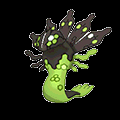

In [29]:
display((image_path))

In [4]:
image_features = {}
print('<<<  Start Extract Image Feature  >>>')
for _idx, image_path in enumerate(image_paths):
    features = extract_features(image_path, model)
    image_features[image_path] = features
    if (_idx+1) % 5 == 0:
        print(f'Extract {_idx+1} / {len(image_paths)} ..ing')
print('🥕 FINISH 🥕')

<<<  Start Extract Image Feature  >>>


c:\Users\hslio\.conda\envs\lhs\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Extract 5 / 809 ..ing
Extract 10 / 809 ..ing
Extract 15 / 809 ..ing
Extract 20 / 809 ..ing
Extract 25 / 809 ..ing
Extract 30 / 809 ..ing
Extract 35 / 809 ..ing
Extract 40 / 809 ..ing
Extract 45 / 809 ..ing
Extract 50 / 809 ..ing
Extract 55 / 809 ..ing
Extract 60 / 809 ..ing
Extract 65 / 809 ..ing
Extract 70 / 809 ..ing
Extract 75 / 809 ..ing
Extract 80 / 809 ..ing
Extract 85 / 809 ..ing
Extract 90 / 809 ..ing
Extract 95 / 809 ..ing
Extract 100 / 809 ..ing
Extract 105 / 809 ..ing
Extract 110 / 809 ..ing
Extract 115 / 809 ..ing
Extract 120 / 809 ..ing
Extract 125 / 809 ..ing
Extract 130 / 809 ..ing
Extract 135 / 809 ..ing
Extract 140 / 809 ..ing
Extract 145 / 809 ..ing
Extract 150 / 809 ..ing
Extract 155 / 809 ..ing
Extract 160 / 809 ..ing
Extract 165 / 809 ..ing
Extract 170 / 809 ..ing
Extract 175 / 809 ..ing
Extract 180 / 809 ..ing
Extract 185 / 809 ..ing
Extract 190 / 809 ..ing
Extract 195 / 809 ..ing
Extract 200 / 809 ..ing
Extract 205 / 809 ..ing
Extract 210 / 809 ..ing
Extract 215 

Cosine_Similarity

Similarity between slakoth and slaking : 63.11%


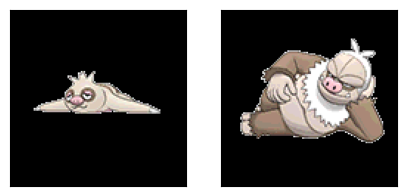

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# input
# a = 'slaking'
# b = 'slakoth'
a = str(input())
b = str(input())
# confirm
confirm_name = [x.split('/')[-1][:-4] for x in list(image_features.keys())]

if (a in confirm_name) and (b in confirm_name):
    a_index = confirm_name.index(a)
    b_index = confirm_name.index(b)
    image1_features = list(image_features.values())[a_index]
    image2_features = list(image_features.values())[b_index]
    similarity = cosine_similarity(image1_features, image2_features)[0][0]
    similarity = str(round((similarity * 100), 2)) + '%'
    print(f"Similarity between\33[91m {a} \033[0mand\33[94m {b} \033[0m: {similarity}")
    # show image
    plt.figure(figsize=(5,5))
    plt.subplot(121)
    plt.imshow(image.load_img(images[a_index]))
    plt.yticks([])
    plt.xticks([])
    plt.subplot(122)
    plt.imshow(image.load_img(images[b_index]))
    plt.yticks([])
    plt.xticks([])
else:
    print(' ❗목록에 없는 포켓몬 입니다❗')
    print('🎈포켓몬의 이름만 입력해주세요🎈')